In [1]:
!git clone https://github.com/rslim087a/track.git

Cloning into 'track'...
remote: Enumerating objects: 12163, done.
remote: Total 12163 (delta 0), reused 0 (delta 0), pack-reused 12163
Receiving objects: 100% (12163/12163), 156.98 MiB | 32.69 MiB/s, done.
Checking out files: 100% (12160/12160), done.


In [60]:
!git clone https://github.com/jaysn1/Self-driving-car-data.git

fatal: destination path 'Self-driving-car-data' already exists and is not an empty directory.


In [61]:
!pip3 install imgaug

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import matplotlib.image as mpimg
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import cv2
import pandas as pd
import random
import os
import ntpath
from imgaug import augmenters as iaa

In [169]:
datadir = 'Self-driving-car-data'
columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']
data = pd.read_csv(os.path.join(datadir, 'driving_log.csv'), names = columns)
pd.set_option('display.max_colwidth', -1)
data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  after removing the cwd from sys.path.


,center,left,right,steering,throttle,reverse,speed
0,C:\Users\Jaysn\Anaconda3\envs\autoCar\beta_simulator_windows\IMG\center_2020_06_10_14_33_56_303.jpg,C:\Users\Jaysn\Anaconda3\envs\autoCar\beta_simulator_windows\IMG\left_2020_06_10_14_33_56_303.jpg,C:\Users\Jaysn\Anaconda3\envs\autoCar\beta_simulator_windows\IMG\right_2020_06_10_14_33_56_303.jpg,0.0,0.0,0,0.000005
1,C:\Users\Jaysn\Anaconda3\envs\autoCar\beta_simulator_windows\IMG\center_2020_06_10_14_33_56_374.jpg,C:\Users\Jaysn\Anaconda3\envs\autoCar\beta_simulator_windows\IMG\left_2020_06_10_14_33_56_374.jpg,C:\Users\Jaysn\Anaconda3\envs\autoCar\beta_simulator_windows\IMG\right_2020_06_10_14_33_56_374.jpg,0.0,0.0,0,0.000020
2,C:\Users\Jaysn\Anaconda3\envs\autoCar\beta_simulator_windows\IMG\center_2020_06_10_14_33_56_443.jpg,C:\Users\Jaysn\Anaconda3\envs\autoCar\beta_simulator_windows\IMG\left_2020_06_10_14_33_56_443.jpg,C:\Users\Jaysn\Anaconda3\envs\autoCar\beta_simulator_windows\IMG\right_2020_06_10_14_33_56_443.jpg,0.0,0.0,0,0.000009
3,C:\Users\Jaysn\Anaconda3\envs\autoCar\beta_simulator_windows\IMG\center_2020_06_10_14_33_56_513.jpg,C:\Users\Jaysn\Anaconda3\envs\autoCar\beta_simulator_windows\IMG\left_2020_06_10_14_33_56_513.jpg,C:\Users\Jaysn\Anaconda3\envs\autoCar\beta_simulator_windows\IMG\right_2020_06_10_14_33_56_513.jpg,0.0,0.0,0,0.000014
4,C:\Users\Jaysn\Anaconda3\envs\autoCar\beta_simulator_windows\IMG\center_2020_06_10_14_33_56_581.jpg,C:\Users\Jaysn\Anaconda3\envs\autoCar\beta_simulator_windows\IMG\left_2020_06_10_14_33_56_581.jpg,C:\Users\Jaysn\Anaconda3\envs\autoCar\beta_simulator_windows\IMG\right_2020_06_10_14_33_56_581.jpg,0.0,0.0,0,0.000015


In [170]:
def path_leaf(path):
  head, tail = ntpath.split(path)
  return tail

data['center'] = data['center'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)
data.head()

,center,left,right,steering,throttle,reverse,speed
0,center_2020_06_10_14_33_56_303.jpg,left_2020_06_10_14_33_56_303.jpg,right_2020_06_10_14_33_56_303.jpg,0.0,0.0,0,0.000005
1,center_2020_06_10_14_33_56_374.jpg,left_2020_06_10_14_33_56_374.jpg,right_2020_06_10_14_33_56_374.jpg,0.0,0.0,0,0.000020
2,center_2020_06_10_14_33_56_443.jpg,left_2020_06_10_14_33_56_443.jpg,right_2020_06_10_14_33_56_443.jpg,0.0,0.0,0,0.000009
3,center_2020_06_10_14_33_56_513.jpg,left_2020_06_10_14_33_56_513.jpg,right_2020_06_10_14_33_56_513.jpg,0.0,0.0,0,0.000014
4,center_2020_06_10_14_33_56_581.jpg,left_2020_06_10_14_33_56_581.jpg,right_2020_06_10_14_33_56_581.jpg,0.0,0.0,0,0.000015


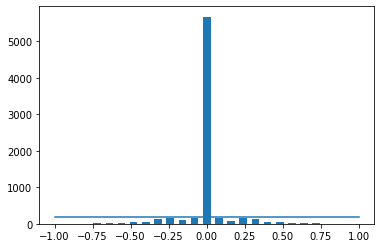

In [171]:
num_bins = 25
samples_per_bin = 200
hist, bins = np.histogram(data['steering'], num_bins)
center = (bins[:-1] + bins[1:]) * 0.5
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))

removed 5479
remaining 1627


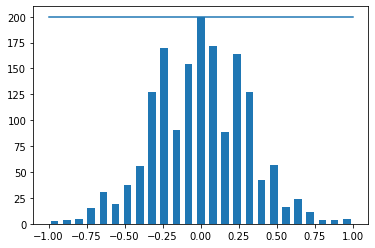

In [172]:
remove_list = []
for j in range(num_bins):
  list_ = []
  for i in range(len(data['steering'])):
    if data['steering'][i] >= bins[j] and data['steering'][i] <= bins[j+1]:
      list_.append(i)
  list_ = shuffle(list_)
  list_ = list_[samples_per_bin:]
  remove_list.extend(list_)

print("removed", len(remove_list))
data.drop(data.index[remove_list], inplace=True)
print("remaining", len(data))

hist, _ = np.histogram(data['steering'], num_bins)
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))

In [0]:
def load_img_steering(datadir, df):
  image_path = []
  steering = []
  for i in range(len(data)):
    indexed_data = data.iloc[i]
    center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]
    image_path.append(os.path.join(datadir, center.strip()))
    steering.append(float(indexed_data[3]))
  image_paths = np.asarray(image_path)
  steerings = np.asarray(steering)
  return image_paths, steerings

image_paths, steerings = load_img_steering(datadir + '/IMG', data)

In [0]:
X_train, X_valid, y_train, y_valid = train_test_split(image_paths, steerings, test_size=0.2, random_state=0)

Text(0.5, 1.0, 'Validation set')

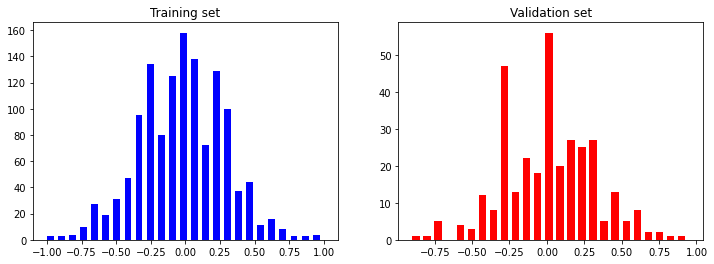

In [175]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
axes[0].hist(y_train, bins=num_bins, width=0.05, color='blue')
axes[0].set_title('Training set')
axes[1].hist(y_valid, bins=num_bins, width=0.05, color='red')
axes[1].set_title('Validation set')

In [0]:
def zoom(image):
  zoom = iaa.Affine(scale=(1, 1.3))
  image = zoom.augment_image(image)
  return image
  


Text(0.5, 1.0, 'zoomed Image')

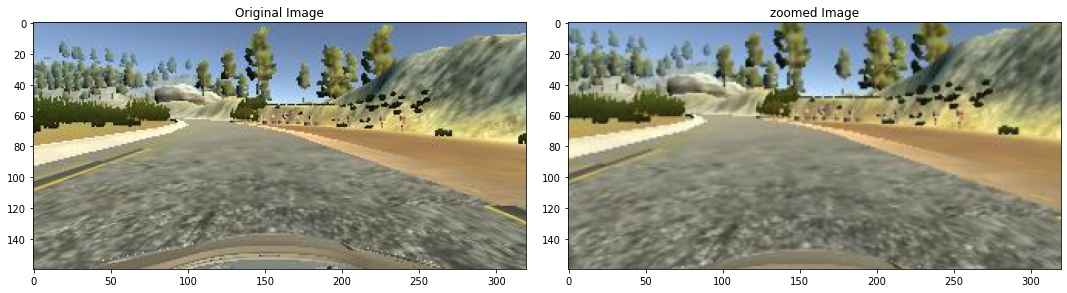

In [177]:
image = image_paths[random.randint(0,1000)]
original_image = mpimg.imread(image)
zoomed_image = zoom(original_image)
fig, axes = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axes[0].imshow(original_image)
axes[0].set_title("Original Image")
axes[1].imshow(zoomed_image)
axes[1].set_title("zoomed Image")

In [0]:
def pan(image):
  pan = iaa.Affine(translate_percent={"x": (-0.1, 0.1), "y": (-0.1, 0.1)})
  image = pan.augment_image(image)
  return image

Text(0.5, 1.0, 'panned Image')

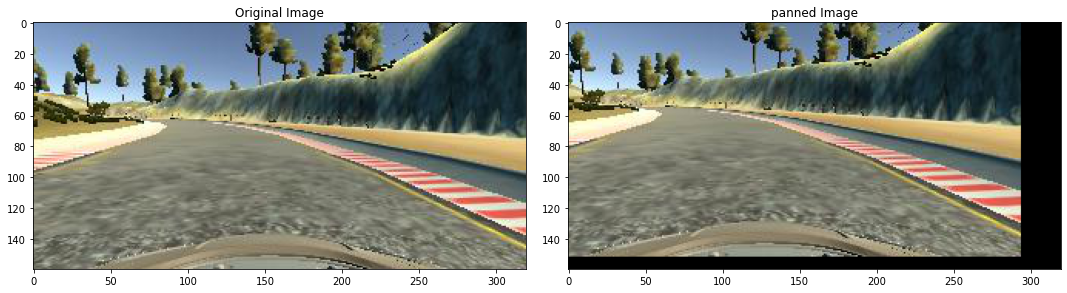

In [179]:
image = image_paths[random.randint(0,1000)]
original_image = mpimg.imread(image)
panned_image = pan(original_image)
fig, axes = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axes[0].imshow(original_image)
axes[0].set_title("Original Image")
axes[1].imshow(panned_image)
axes[1].set_title("panned Image")

In [0]:
def image_brightness(image):
  brightness = iaa.Multiply((0.2, 1.2))
  image = brightness.augment_image(image)
  return image

Text(0.5, 1.0, 'Brightness Aultered Image')

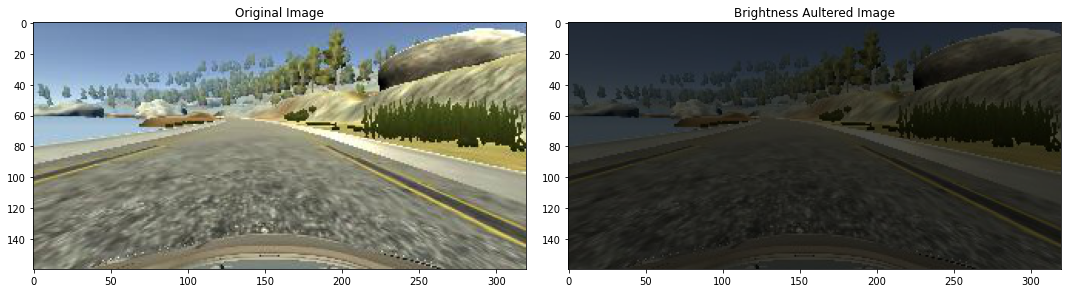

In [146]:
image = image_paths[random.randint(0,1000)]
original_image = mpimg.imread(image)
brightness_aultered_image = image_brightness(original_image)
fig, axes = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axes[0].imshow(original_image)
axes[0].set_title("Original Image")
axes[1].imshow(brightness_aultered_image)
axes[1].set_title("Brightness Aultered Image")

In [0]:
def random_flip(image, steering_angle):
  image = cv2.flip(image, 1)
  steering_angle = -steering_angle
  return image, steering_angle

-0.35
0.35


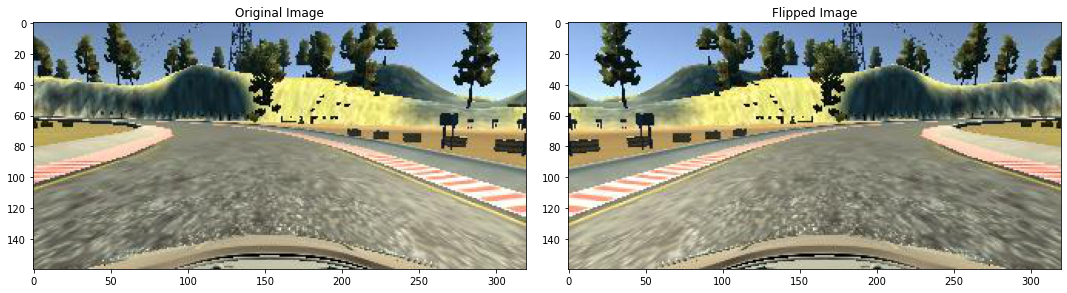

In [148]:
index = random.randint(0,1000)
image = image_paths[index]
steering_angle = steerings[index]
original_image = mpimg.imread(image)
flipped_image, steering_angle = random_flip(original_image, steering_angle)
fig, axes = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axes[0].imshow(original_image)
axes[0].set_title("Original Image")
axes[1].imshow(flipped_image)
axes[1].set_title("Flipped Image")
print(steerings[index])
print(steering_angle)

In [0]:
def random_augment(image, steering_angle):
  image = mpimg.imread(image)
  if np.random.rand() < 0.5:
    image = pan(image)
  if np.random.rand() < 0.5:
    image = zoom(image)
  if np.random.rand() < 0.5:
    image = image_brightness(image)
  if np.random.rand() < 0.5:
    image, steering_angle = random_flip(image, steering_angle)
  return image, steering_angle


In [150]:
ncol = 2
nrow = 10
fig, axs = plt.subplots(nrow, ncol, figsize=(15, 50))
fig.tight_layout()

for i in range(10):
  randnum = random.randint(0, len(image_paths) - 1)
  random_image = image_paths[randnum]
  random_steering = steerings[randnum]
  original_image = mpimg.imread(random_image)
  augmented_image, steering = random_augment(random_image, random_steering)

  axs[i][0].imshow(original_image)
  axs[i][0].set_title("original Image")
  axs[i][1].imshow(augmented_image)
  axs[i][1].set_title("Augmented Image")

Output hidden; open in https://colab.research.google.com to view.

In [0]:
def img_preprocess(img):
  img = img[60:135 , :, :]
  img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
  img = cv2.GaussianBlur(img, (3,3), 0)
  img = cv2.resize(img, (200, 66))
  img = img/255
  return img

In [0]:
# X_train = np.array(list(map(img_preprocess, X_train)))
# X_valid = np.array(list(map(img_preprocess, X_valid)))

Text(0.5, 1.0, 'Preprocessed Image')

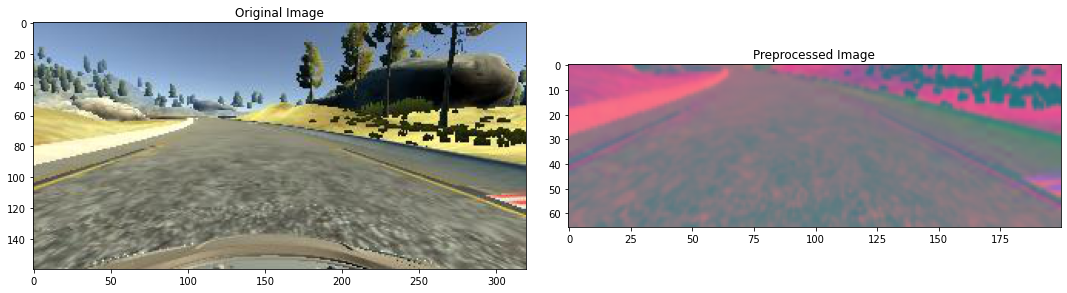

In [184]:
image = image_paths[201]
original_image = mpimg.imread(image)
preprocessed_image = img_preprocess(original_image)
fig, axes = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axes[0].imshow(original_image)
axes[0].set_title("Original Image")
axes[1].imshow(preprocessed_image)
axes[1].set_title("Preprocessed Image")

In [0]:
def batch_generator(image_paths, steering_angle, batch_size, istraining):
  while True:
    batch_img = []
    batch_steering = []
    for i in range(batch_size):
      random_index = random.randint(0, len(image_paths) - 1)
      if istraining:
        im, steering = random_augment(image_paths[random_index], steering_angle[random_index])
      else:
        im = mpimg.imread(image_paths[random_index])
        steering = steering_angle[random_index]
      im = img_preprocess(im)
      batch_img.append(im)
      batch_steering.append(steering)
    yield (np.asarray(batch_img), np.asarray(batch_steering))

In [0]:
x_train_gen, y_train_gen = next(batch_generator(X_train, y_train, 1, 1))
x_valid_gen, y_valid_gen = next(batch_generator(X_valid, y_valid, 1, 0))

In [189]:
print(x_train_gen.shape)

(1, 66, 200, 3)


In [0]:
def nvidia_model():
  model = Sequential()
  model.add(Convolution2D(24, (5, 5), strides=(2, 2),input_shape=(66, 200, 3), activation='elu'))
  model.add(Convolution2D(36, (5, 5), strides=(2, 2), activation='elu'))
  model.add(Convolution2D(48, (5, 5), strides=(2, 2), activation='elu'))
  model.add(Convolution2D(64, (3, 3), activation='elu'))
  model.add(Convolution2D(64, (3, 3), activation='elu'))
  # model.add(Dropout(0.5))

  model.add(Flatten())

  model.add(Dense(100, activation='elu'))
  # model.add(Dropout(0.5))
  
  model.add(Dense(50, activation='elu'))
  
  model.add(Dense(10, activation='elu'))

  model.add(Dense(1))

  model.compile(Adam(learning_rate=1e-4), loss='mse')
  return model

In [199]:
model = nvidia_model()
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 31, 98, 24)        1824      
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 14, 47, 36)        21636     
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 5, 22, 48)         43248     
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 3, 20, 64)         27712     
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 1, 18, 64)         36928     
_________________________________________________________________
flatten_7 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_25 (Dense)             (None, 100)              

In [201]:
h = model.fit_generator(batch_generator(X_train, y_train, 100, 1), steps_per_epoch=300, epochs=10, validation_data=batch_generator(X_valid, y_valid, 100, 0), validation_steps=200, verbose=1, shuffle=1)

Epoch 1/10
300/300 [==============================] - 431s 1s/step - loss: 0.0661 - val_loss: 0.0462
Epoch 2/10
300/300 [==============================] - 423s 1s/step - loss: 0.0599 - val_loss: 0.0424
Epoch 3/10
300/300 [==============================] - 426s 1s/step - loss: 0.0555 - val_loss: 0.0355
Epoch 4/10
300/300 [==============================] - 426s 1s/step - loss: 0.0517 - val_loss: 0.0394
Epoch 5/10
300/300 [==============================] - 422s 1s/step - loss: 0.0486 - val_loss: 0.0292
Epoch 6/10
300/300 [==============================] - 423s 1s/step - loss: 0.0451 - val_loss: 0.0397
Epoch 7/10
300/300 [==============================] - 423s 1s/step - loss: 0.0446 - val_loss: 0.0327
Epoch 8/10
300/300 [==============================] - 422s 1s/step - loss: 0.0428 - val_loss: 0.0397
Epoch 9/10
300/300 [==============================] - 424s 1s/step - loss: 0.0411 - val_loss: 0.0354
Epoch 10/10
300/300 [==============================] - 421s 1s/step - loss: 0.0402 - val_lo

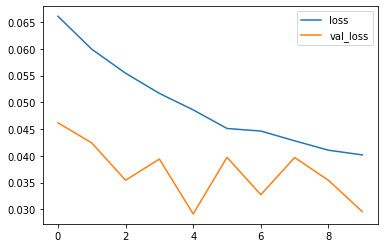

In [205]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

In [0]:
model.save('latest_model.h5')


In [0]:
from google.colab import files
files.download('latest_model.h5')

In [59]:
keras.__version__
import tensorflow
tensorflow.__version__

'2.2.0'